<a href="https://colab.research.google.com/github/mapmatters/GAN_tutorial/blob/master/02_02_deep_learning_convolutions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 합성곱

### 라이브러리 임포트

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
from scipy.ndimage import correlate
import numpy as np
from skimage import data
from skimage.color import rgb2gray
from skimage.transform import rescale, resize

### 원본이미지

(64, 64)


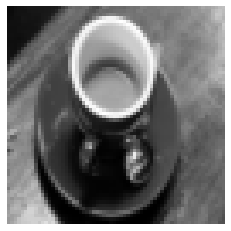

In [8]:
im = rgb2gray(data.coffee())
im = resize(im, (64,64))
print(im.shape)

plt.axis('off')
plt.imshow(im, cmap='gray');

### 수평 모서리 필터

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[-5.91282217e-02 -1.25147810e-01 -2.09005900e-01 ... -1.92371184e+00
  -2.01554218e+00 -2.09083001e+00]
 [-5.66856887e-02 -1.24808276e-01 -2.11641360e-01 ... -1.97874773e+00
  -2.11577624e+00 -2.14974525e+00]
 [-2.35257696e-04 -6.11007288e-03 -1.31426356e-02 ... -9.62832960e-02
  -1.40728578e-01 -8.97058422e-02]
 ...
 [-4.70276968e-02  1.61905868e-02  8.77825024e-02 ...  5.92946507e-02
   4.62024412e-02  5.87009385e-02]
 [ 1.83580546e-02  7.27143585e-02  8.52150229e-02 ...  1.58120532e-02
   8.12345713e-03  3.27752761e-02]
 [ 3.10721536e-02  3.01866200e-03 -5.50594522e-02 ... -4.72228495e-02
  -2.67855314e-03  2.73750954e-02]]
(64, 64)


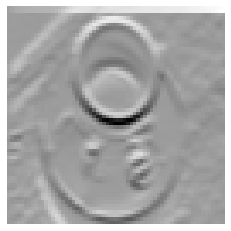

In [11]:
filter1 = np.array([    
    [ 1,  1,  1],
    [ 0,  0,  0],
    [-1, -1, -1]
])


new_image = np.zeros(im.shape)
im_pad = np.pad(im, 1, 'constant')
print(new_image)

for i in range(im.shape[0]):
  for j in range(im.shape[1]):
    try:
      new_image[i,j] = \
      im_pad[i-1,j-1] * filter1[0,0] + \
      im_pad[i-1,j] * filter1[0,1] + \
      im_pad[i-1,j+1] * filter1[0,2] + \
      im_pad[i,j-1] * filter1[1,0] + \
      im_pad[i,j] * filter1[1,1] + \
      im_pad[i,j+1] * filter1[1,2] +\
      im_pad[i+1,j-1] * filter1[2,0] + \
      im_pad[i+1,j] * filter1[2,1] + \
      im_pad[i+1,j+1] * filter1[2,2] 
    except:
      pass

print(new_image)
print(im.shape)
plt.axis('off')
plt.imshow(new_image, cmap='Greys');

### 수직 모서리 필터

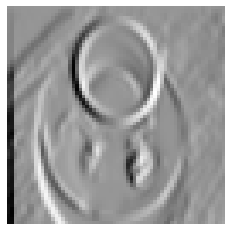

In [12]:
filter2 = np.array([
    [ -1,  0,  1],
    [ -1,  0,  1],
    [ -1,  0,  1]
])

new_image = np.zeros(im.shape)

im_pad = np.pad(im,1, 'constant')

for i in range(im.shape[0]):
    for j in range(im.shape[1]):
        try:
            new_image[i,j] = \
            im_pad[i-1,j-1] * filter2[0,0] + \
            im_pad[i-1,j] * filter2[0,1] + \
            im_pad[i-1,j+1] * filter2[0,2] + \
            im_pad[i,j-1] * filter2[1,0] + \
            im_pad[i,j] * filter2[1,1] + \
            im_pad[i,j+1] * filter2[1,2] +\
            im_pad[i+1,j-1] * filter2[2,0] + \
            im_pad[i+1,j] * filter2[2,1] + \
            im_pad[i+1,j+1] * filter2[2,2] 
        except:
            pass

plt.axis('off')
plt.imshow(new_image, cmap='Greys');

### 스트라이드=2 수평 모서리 필터

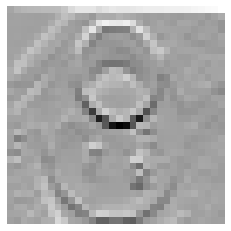

In [14]:
filter1 = np.array([
    [ 1,  1,  1],
    [ 0,  0,  0],
    [-1, -1, -1]
])

stride = 2

new_image = np.zeros((int(im.shape[0] / stride), int(im.shape[1] / stride)))

im_pad = np.pad(im,1, 'constant')

for i in range(0,im.shape[0],stride):
    for j in range(0,im.shape[1],stride):
        try:
            new_image[int(i/stride),int(j/stride)] = \
            im_pad[i-1,j-1] * filter1[0,0] + \
            im_pad[i-1,j] * filter1[0,1] + \
            im_pad[i-1,j+1] * filter1[0,2] + \
            im_pad[i,j-1] * filter1[1,0] + \
            im_pad[i,j] * filter1[1,1] + \
            im_pad[i,j+1] * filter1[1,2] +\
            im_pad[i+1,j-1] * filter1[2,0] + \
            im_pad[i+1,j] * filter1[2,1] + \
            im_pad[i+1,j+1] * filter1[2,2] 
        except:
            pass

plt.axis('off')
plt.imshow(new_image, cmap='Greys');

스트라이드=2 수직 모서리 필터

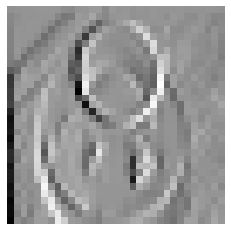

In [15]:
filter2 = np.array([
    [ -1,  0,  1],
    [ -1,  0,  1],
    [ -1,  0,  1]
])

stride = 2

new_image = np.zeros((int(im.shape[0] / stride), int(im.shape[1] / stride)))

im_pad = np.pad(im,1, 'constant')

for i in range(0,im.shape[0],stride):
    for j in range(0,im.shape[1],stride):
        try:
            new_image[int(i/stride),int(j/stride)] = \
            im_pad[i-1,j-1] * filter2[0,0] + \
            im_pad[i-1,j] * filter2[0,1] + \
            im_pad[i-1,j+1] * filter2[0,2] + \
            im_pad[i,j-1] * filter2[1,0] + \
            im_pad[i,j] * filter2[1,1] + \
            im_pad[i,j+1] * filter2[1,2] +\
            im_pad[i+1,j-1] * filter2[2,0] + \
            im_pad[i+1,j] * filter2[2,1] + \
            im_pad[i+1,j+1] * filter2[2,2] 
        except:
            pass

plt.axis('off')
plt.imshow(new_image, cmap='Greys');